<a href="https://colab.research.google.com/github/sakhilesk/Unrate-T10y-correlation/blob/main/Unemployment_Rate_and_T10y_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# Read the data
unrate_df = pd.read_csv('UNRATE.csv', parse_dates=['DATE'], na_values=['.'])
t10y20y_df = pd.read_csv('T10Y2Y.csv', parse_dates=['DATE'], na_values=['.'])

In [8]:
# Merge the dataframes
merged_df = pd.merge(unrate_df, t10y20y_df, on='DATE', suffixes=('UNRATE','T10Y2Y'))

In [9]:
# Remove rows with missing values
merged_df = merged_df.dropna()

In [10]:
# Calculate correlation
correlation = merged_df['UNRATE'].corr(merged_df['T10Y2Y'])

In [11]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['UNRATE'], merged_df['T10Y2Y'])

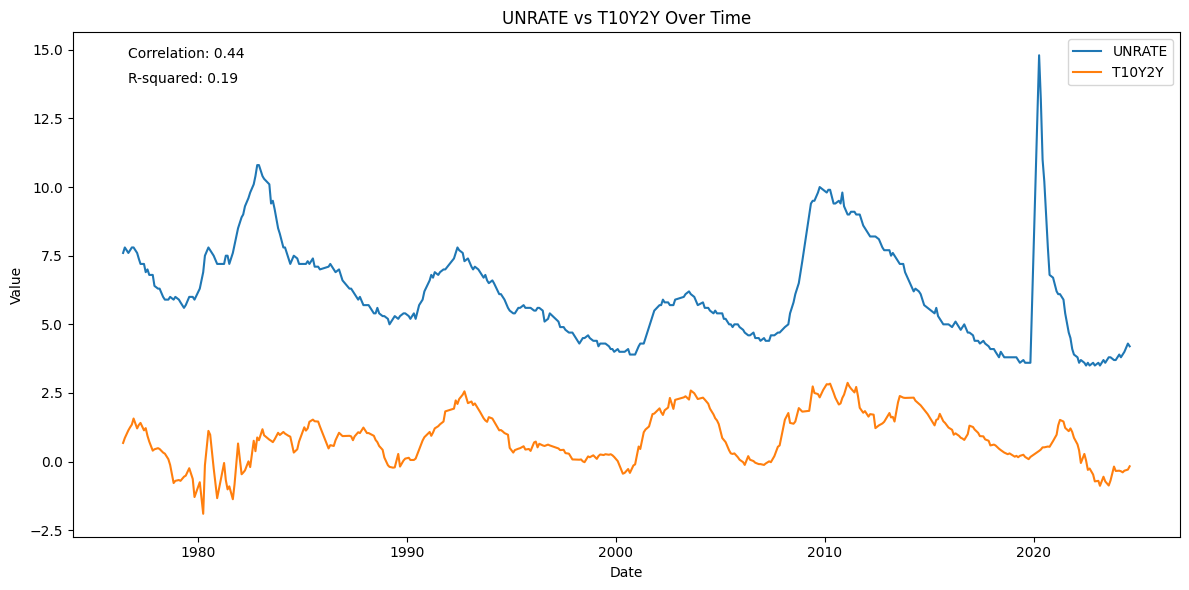

In [23]:
# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(merged_df['DATE'], merged_df['UNRATE'], label='UNRATE')
plt.plot(merged_df['DATE'], merged_df['T10Y2Y'], label='T10Y2Y')
plt.title('UNRATE vs T10Y2Y Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
# Correlation information to the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}',transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'R-squared: {r_value**2:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

In [17]:
# Additional statistics
print(f"Correlation between UNRATE and T10Y2Y: {correlation:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")

Correlation between UNRATE and T10Y2Y: 0.44
R-squared: 0.19
P-value: 0.0000
Standard Error: 0.0232


In [21]:
# Calculate and print the average values
avg_unrate = merged_df['UNRATE'].mean()
avg_t10y20y = merged_df['T10Y2Y'].mean()
print(f"Average UNRATE: {avg_unrate:.2f}")
print(f"Average T10Y2Y: {avg_t10y20y:.2f}")

Average UNRATE: 6.14
Average T10Y2Y: 0.85
